In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LinearRegression
import mlflow
import mlflow.sklearn

# Data Loading and Understanding

In [8]:
# Load the dataset into a Dask DataFrame
df = dd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
print("Number of rows:", df.shape[0].compute())
print("Column names:", df.columns)

Number of rows: 200
Column names: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [12]:
print("Data types:")
print(df.dtypes)


Data types:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [13]:
print("Missing values per column:")
print(df.isna().sum().compute())

Missing values per column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [14]:
print("Statistical information:")
print(df.describe().compute())

Statistical information:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


# Data Visualisation

In [15]:
# Convert Dask DataFrame to Pandas DataFrame
df_pandas = df.compute()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

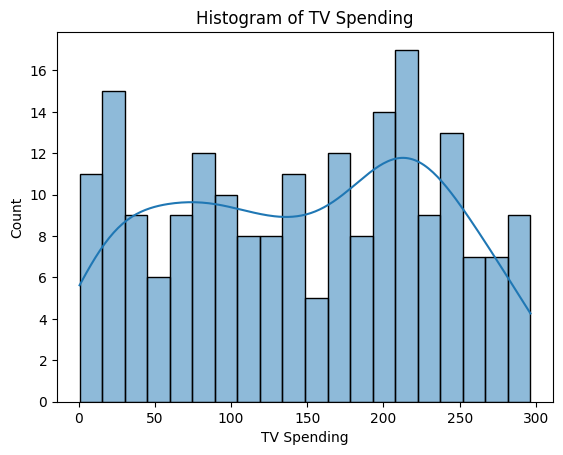

In [19]:
# Plot 1: Histogram of TV spending
sns.histplot(data=df_pandas, x='TV', bins=20, kde=True)
plt.xlabel('TV Spending')
plt.title('Histogram of TV Spending')
plt.show()

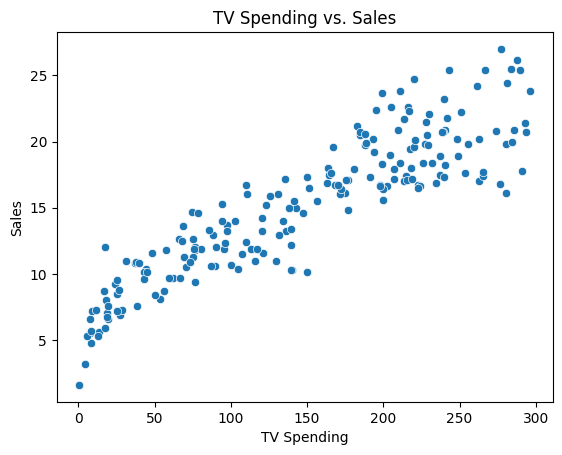

In [20]:
# Plot 2: Scatter plot of TV spending vs. Sales
sns.scatterplot(data=df_pandas, x='TV', y='Sales')
plt.xlabel('TV Spending')
plt.ylabel('Sales')
plt.title('TV Spending vs. Sales')
plt.show()

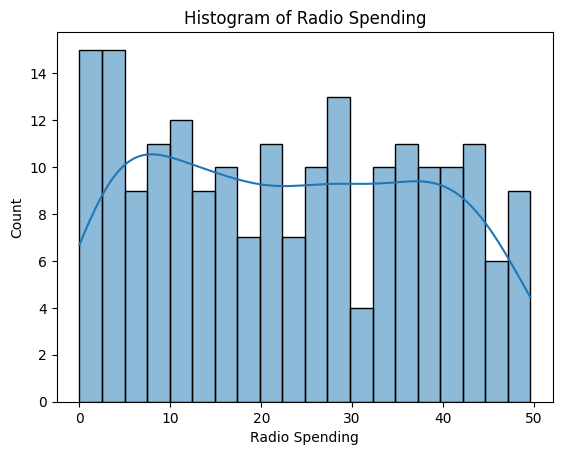

In [21]:
# Plot 3: Histogram of Radio spending
sns.histplot(data=df_pandas, x='Radio', bins=20, kde=True)
plt.xlabel('Radio Spending')
plt.title('Histogram of Radio Spending')
plt.show()

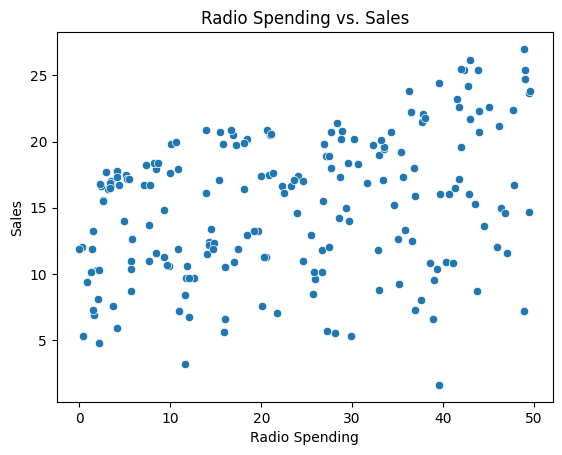

In [22]:
# Plot 4: Scatter plot of Radio spending vs. Sales
sns.scatterplot(data=df_pandas, x='Radio', y='Sales')
plt.xlabel('Radio Spending')
plt.ylabel('Sales')
plt.title('Radio Spending vs. Sales')
plt.show()

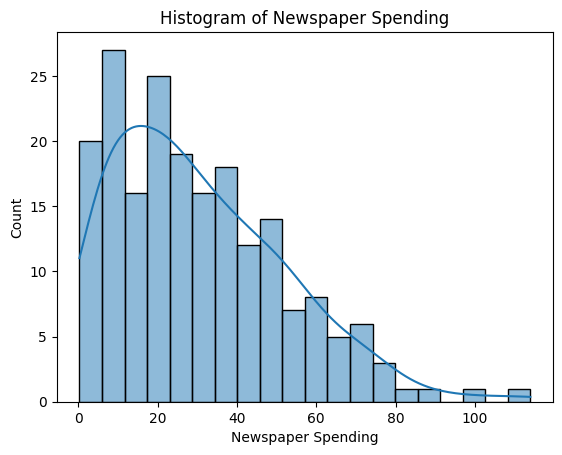

In [23]:
# Plot 5: Histogram of Newspaper spending
sns.histplot(data=df_pandas, x='Newspaper', bins=20, kde=True)
plt.xlabel('Newspaper Spending')
plt.title('Histogram of Newspaper Spending')
plt.show()

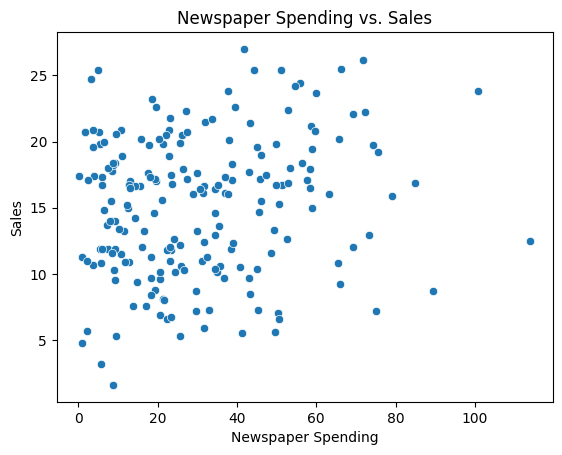

In [24]:
# Plot 6: Scatter plot of Newspaper spending vs. Sales
sns.scatterplot(data=df_pandas, x='Newspaper', y='Sales')
plt.xlabel('Newspaper Spending')
plt.ylabel('Sales')
plt.title('Newspaper Spending vs. Sales')
plt.show()

# Model Building

In [25]:
# Split the dataset into features and target variable
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/dask_ml/model_selection/_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


In [28]:
# Convert Dask DataFrames to Dask Arrays
X_train_array = X_train.to_dask_array(lengths=True)
y_train_array = y_train.to_dask_array(lengths=True)

In [29]:
# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Train the model
with mlflow.start_run():
    regressor.fit(X_train_array, y_train_array)


In [30]:
# Evaluate the model on the test set and log the metrics using MLflow
X_test_array = X_test.to_dask_array(lengths=True)
y_test_array = y_test.to_dask_array(lengths=True)
score = regressor.score(X_test_array, y_test_array)
mlflow.log_metric("r2_score", score)

In [31]:
score

0.887036994768593

In [32]:
# Save the trained model
mlflow.sklearn.log_model(regressor, "model")